In [1203]:
%pip install gym
%pip install pygame

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1204]:
import gym
import numpy as np

In [1205]:
env = gym.make('CartPole-v1')
#env = gym.make('CartPole-v1', render_mode='human')

In [1206]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

In [1207]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

In [1208]:
intervals_cart_position = 2
intervals_cart_velocity = 3
intervals_pole_angle = 10
intervals_pole_angle_velocity = 7

bins_cart_position = np.linspace(-2.4, 2.4,intervals_cart_position )
bins_cart_velocity = np.linspace(-200, 200, intervals_cart_velocity)
bins_pole_angle = np.linspace(-0.2095, 0.2095, intervals_pole_angle)
bins_pole_angle_velocity = np.linspace(-10000,10000,intervals_pole_angle_velocity)

In [1209]:
def get_state(obs):
    state_bins_cart_position = np.digitize(obs[0], bins_cart_position)
    state_bins_cart_velocity= np.digitize(obs[1], bins_cart_velocity)
    state_bins_pole_angle = np.digitize(obs[2], bins_pole_angle)
    state_pole_angle_velocity = np.digitize(obs[3], bins_pole_angle_velocity)

    state = state_bins_cart_position, state_bins_cart_velocity, state_bins_pole_angle,state_pole_angle_velocity
    return state

In [1210]:
state = get_state([-1.4, -2., 0.23, 1.2])
state

(1, 1, 10, 4)

In [1211]:
Q = np.random.random((intervals_cart_position+1,intervals_cart_velocity+1 ,intervals_pole_angle+1,intervals_pole_angle_velocity+1,2))

In [1212]:
def updateQ( Q, state, action, reward, newState, alfa , gamma):
    Q[state][action] = Q[state][action] + alfa*(reward + gamma*(np.max(Q[newState])) - Q[state][action])

In [1213]:
def play(alfa, gamma, epsilon, Q):
    obs =env.reset()[0]
    terminated = False
    truncated = False
    score = 0 
    while not terminated and not truncated:
        state = get_state(obs)
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, terminated, truncated, info = env.step(action)
        updateQ(Q, state, action, reward, get_state(obs), alfa, gamma)
        score += reward
    return Q, score

In [1214]:
def play_optimal_policy (alfa, gamma, Q):
    obs =env.reset()[0]
    terminated = False
    truncated = False
    score = 0 
    while not terminated and not truncated:
        state = get_state(obs)
        action = optimal_policy(state, Q)
        obs, reward, terminated, truncated, info = env.step(action)
        updateQ(Q, state, action, reward, get_state(obs), alfa, gamma)

        score += reward
    return Q, score

In [1221]:
alpha = 1
gamma = 0.9
epsilon_explore =  1
epsilon_exploit = 0

iterations = 2000
explore_iterations = 100
exploit_iterartions = 50

total_score = 0
mean_score = 0

learning_means_score =[]

#Primero exploramos 
# for i in range(explore_iterations):
#     play(alfa, gamma, 1, Q)

# for i in range(exploit_iterartions):
#     play(alfa, gamma, 0, Q)


for iteration in range(iterations):
    Q, score  = play(alpha, gamma, epsilon_explore, Q)
    total_score =  total_score + score
    learning_means_score.append((score,iteration))

    print("Score", score, "iteration: ", iteration )

    if(epsilon_explore>0.1):
        epsilon_explore += -0.001

    if(alpha>0.001):
        alpha += -0.01   

mean_score = total_score/iterations

#utilizamos la policy optima
mean_score_optimal_policy = 0
learning_means_score_optimal_policy =[]
alfa = 0.8
for iteration in range(100):
    Q, score  = play_optimal_policy(alpha, gamma, Q)
    print("Score optimal policy", score," iteration: ", iteration)   
    mean_score_optimal_policy += score
    learning_means_score_optimal_policy.append((score, iteration))

print("Mean score greedy policy", mean_score)
print("Mean score optimal policy: ", mean_score_optimal_policy/100)

# if(mean_score_optimal_policy!= 500.0):

#     mean_score_optimal_policy_final = 0 
#     for i in range(500):
#         Q, score_final = play_optimal_policy(Q)
#         mean_score_optimal_policy_final += score_final


# print("mean_score_optimal_policy final : ", mean_score_optimal_policy_final/500)

    #if(epsilon_explore> 0.7):
    #     epsilon_explore += -0.01

    # if(epsilon_explore> 0.7):
    #     epsilon_explore += -0.01

    # if(max_score <500):
    #     #Volvemos a explorar  
    #     for i in range(explore_iterations):
    #         Q, score_eplore2 = play(alfa, gamma, epsilon_explore, Q)

    #     #Volvemos a realizar exploit 
    #     for i in range(exploit_iterartions_final):
    #         Q, score_eploite2 = play(alfa, gamma, epsilon_exploit, Q)
    #         if score_eploite2 > max_score:
    #             max_score = score_eploite2
    #     print("2do score: ")
    #     print(max_score)




Score 17.0 iteration:  0
Score 28.0 iteration:  1
Score 12.0 iteration:  2
Score 20.0 iteration:  3
Score 15.0 iteration:  4
Score 20.0 iteration:  5
Score 13.0 iteration:  6
Score 45.0 iteration:  7
Score 32.0 iteration:  8
Score 44.0 iteration:  9
Score 29.0 iteration:  10
Score 36.0 iteration:  11
Score 93.0 iteration:  12
Score 23.0 iteration:  13
Score 43.0 iteration:  14
Score 29.0 iteration:  15
Score 21.0 iteration:  16
Score 30.0 iteration:  17
Score 15.0 iteration:  18
Score 10.0 iteration:  19
Score 11.0 iteration:  20
Score 34.0 iteration:  21
Score 13.0 iteration:  22
Score 32.0 iteration:  23
Score 16.0 iteration:  24
Score 17.0 iteration:  25
Score 51.0 iteration:  26
Score 14.0 iteration:  27
Score 15.0 iteration:  28
Score 13.0 iteration:  29
Score 24.0 iteration:  30
Score 36.0 iteration:  31
Score 13.0 iteration:  32
Score 13.0 iteration:  33
Score 17.0 iteration:  34
Score 30.0 iteration:  35
Score 21.0 iteration:  36
Score 29.0 iteration:  37
Score 26.0 iteration: 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


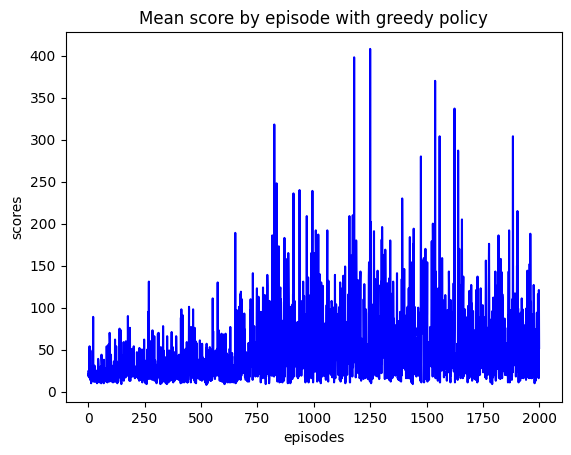

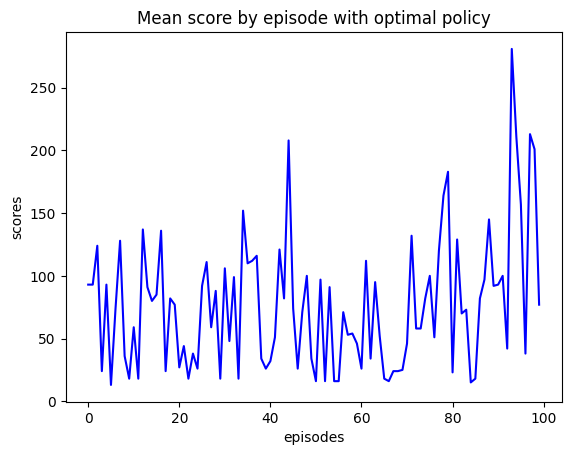

In [1216]:
#Graficas del proceso de entrenamiento y corrida
%pip install matplotlib
import matplotlib.pyplot as plt

x = []
y = []
for tuple in learning_means_score:
    x.append(tuple[1])
    y.append(tuple[0])

#Entrenamiento, utilizando Greedy policy 
plt.plot(x,y,color='blue')
plt.xlabel('episodes')
plt.ylabel('scores')
plt.title('Mean score by episode with greedy policy')
plt.show()

x = []
y = []
for tuple in learning_means_score_optimal_policy:
    x.append(tuple[1])
    y.append(tuple[0])

#Corrida, utilizando Optimal policy 

plt.plot(x,y,color='blue')
plt.xlabel('episodes')
plt.ylabel('scores')
plt.title('Mean score by episode with optimal policy')
plt.show()

